In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving customers.xlsx to customers.xlsx
Saving onlineretail – Copie.xlsx to onlineretail – Copie.xlsx


In [ ]:
#Extraction
customeer = pd.read_excel('customers.xlsx')
online_retail = pd.read_excel('onlineretail – Copie.xlsx')

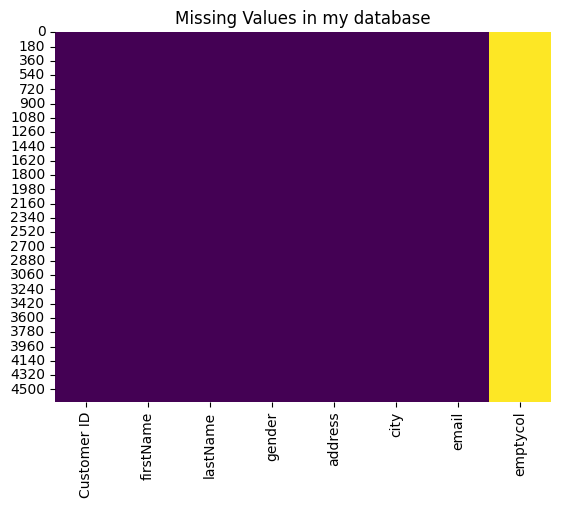

In [ ]:
#Transformation
sns.heatmap(customeer.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in my database")
plt.show()

In [ ]:
empty_cols_customeer = [col for col in customeer.columns if customeer[col].isnull().any()]
customeer = customeer.drop(columns=empty_cols_customeer)
print(customeer.columns)

Index(['Customer ID', 'firstName', 'lastName', 'gender', 'address', 'city',
       'email'],
      dtype='object')


In [ ]:
customeer.head()

,Customer ID,firstName,lastName,gender,address,city,email
0,13085,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com
1,13078,Brent,Hackett,male,558 Anderson Streets,Tamiatown,Morris26@yahoo.com
2,15362,Carol,Schneider,female,000 Johns Mews,Clovis,Tyrel86@gmail.com
3,18102,Turner,Wintheiser,male,020 Ebert Mountain,El Paso,Lane_Schmeler82@hotmail.com
4,12682,Maci,Hahn,female,78303 Clifton Forges,Glenniecester,Muhammad67@gmail.com


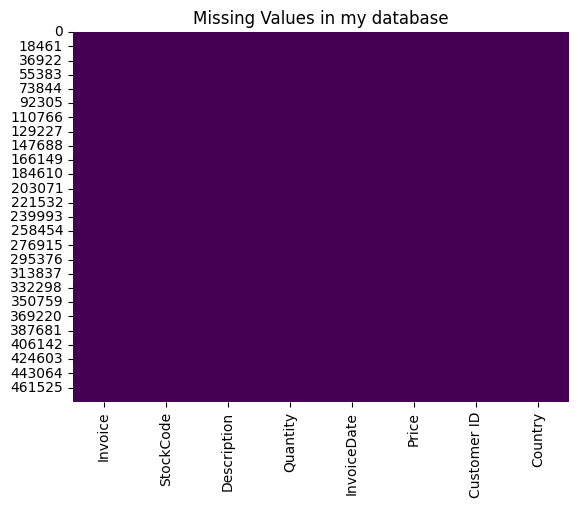

In [ ]:

sns.heatmap(online_retail.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in my database")
plt.show()

In [ ]:
 # Detecting duplicate rows for customer
customer_duplicates = customeer.duplicated()

#Displaying the duplicate rows
duplicate_rows = customeer[customer_duplicates]
print("Duplicate rows in 'customer' (exact duplicates):\n", duplicate_rows)

# Counting the number of duplicates
num_duplicates = customer_duplicates.sum()
print("\nNumber of duplicate rows:", num_duplicates)

Duplicate rows in 'customer' (exact duplicates):
       Customer ID firstName    lastName  gender                 address  \
4648        13085     Aaron    Mitchell    male      20439 Vincent Walk   
4649        16393   Tyshawn     Pfeffer  female  17181 Pfeffer Crossing   
4650        15246     Kacey  Jakubowski  female  50117 Klein Expressway   
4651        15887     Sydni        Mraz    male   19178 Williamson Glen   
4652        16402  Federico     Ziemann    male   0015 Cummings Terrace   
4653        15894     Chyna      Renner  female       43146 Sallie Path   
4654        12763    Jeromy     Johnson    male    4674 Jenkins Centers   
4655        17674   Zackary   Bashirian  female  735 Kamille Expressway   
4656        15899    Maudie     Quigley    male   2410 Makenna Crossing   

                  city                           email  
4648        Davisstead           Rozella89@hotmail.com  
4649             Plano         Verda.Runte68@yahoo.com  
4650  South Arielfield      

In [ ]:
#removing duplicates
customer_no_duplicates = customeer.drop_duplicates()
 # Checking for duplicates in the cleaned DataFrame
customer_check_duplicates = customer_no_duplicates.duplicated()
num_remaining_duplicates = customer_check_duplicates.sum()
print("Number of remaining exact duplicate rows in 'customer':", num_remaining_duplicates)

Number of remaining exact duplicate rows in 'customer': 0


In [ ]:
#joining customer dataset with online_retail
joined_data = pd.merge(online_retail, customer_no_duplicates, on='Customer ID', how='left')

In [ ]:
joined_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,firstName,lastName,gender,address,city,email
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com


In [ ]:
# Filtering for Negative Quantities
returns_data = joined_data[joined_data['Quantity'] < 0]

#Printing the new dataframe
print(returns_data.head())

     Invoice StockCode                    Description  Quantity  \
175  C489449     22087       PAPER BUNTING WHITE LACE       -12   
176  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
177  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
178  C489449     21896             POTTING SHED TWINE        -6   
179  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            InvoiceDate  Price  Customer ID    Country firstName lastName  \
175 2009-12-01 10:33:00   2.95        16321  Australia     Leann  Goyette   
176 2009-12-01 10:33:00   1.65        16321  Australia     Leann  Goyette   
177 2009-12-01 10:33:00   4.25        16321  Australia     Leann  Goyette   
178 2009-12-01 10:33:00   2.10        16321  Australia     Leann  Goyette   
179 2009-12-01 10:33:00   2.95        16321  Australia     Leann  Goyette   

    gender             address       city                     email  
175   male  00015 Alva Heights  Millcreek  Juwan.Cummings@yahoo.

In [ ]:

non_negative_quantity_mask = joined_data['Quantity'] >= 0

# Filtering the DataFrame using the mask
joined_data = joined_data[non_negative_quantity_mask]

#  Checking to make sure the negative quantities are gone
print(joined_data[joined_data['Quantity'] < 0])

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, firstName, lastName, gender, address, city, email]
Index: []


In [ ]:
# Selecting object columns
object_cols = joined_data.select_dtypes(include=['object']).columns

# Converting object columns to string
joined_data[object_cols] = joined_data[object_cols].astype('string')

#  Checking the data types
print(joined_data.dtypes)

Invoice        string[python]
StockCode      string[python]
Description    string[python]
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country        string[python]
firstName      string[python]
lastName       string[python]
gender         string[python]
address        string[python]
city           string[python]
email          string[python]
dtype: object


In [ ]:
joined_data['Description'] = joined_data['Description'].str.replace('&', 'and')

In [ ]:
# making customer dimension
customer_dimension = joined_data[[
    'Customer ID', 'Country', 'firstName', 'lastName', 'gender', 'address', 'city', 'email'
]]

# Remove=ing duplicates
customer_dimension = customer_dimension.drop_duplicates(subset=['Customer ID'])
customer_dimension.head()

,Customer ID,Country,firstName,lastName,gender,address,city,email
0,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com
12,13078,United Kingdom,Brent,Hackett,male,558 Anderson Streets,Tamiatown,Morris26@yahoo.com
31,15362,United Kingdom,Carol,Schneider,female,000 Johns Mews,Clovis,Tyrel86@gmail.com
54,18102,United Kingdom,Turner,Wintheiser,male,020 Ebert Mountain,El Paso,Lane_Schmeler82@hotmail.com
71,12682,France,Maci,Hahn,female,78303 Clifton Forges,Glenniecester,Muhammad67@gmail.com


In [ ]:

#making all column names start with an uppercase
customer_dimension.columns = customer_dimension.columns.str.capitalize()
#merging first name and last name into a column named full name
customer_dimension['Full Name'] = customer_dimension['Firstname'] + ' ' + customer_dimension['Lastname']
#droping first name and last name
customer_dimension = customer_dimension.drop(columns=['Firstname', 'Lastname'])


customer_dimension.head()


,Customer id,Country,Gender,Address,City,Email,Full Name
0,13085,United Kingdom,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,Aaron Mitchell
12,13078,United Kingdom,male,558 Anderson Streets,Tamiatown,Morris26@yahoo.com,Brent Hackett
31,15362,United Kingdom,female,000 Johns Mews,Clovis,Tyrel86@gmail.com,Carol Schneider
54,18102,United Kingdom,male,020 Ebert Mountain,El Paso,Lane_Schmeler82@hotmail.com,Turner Wintheiser
71,12682,France,female,78303 Clifton Forges,Glenniecester,Muhammad67@gmail.com,Maci Hahn


In [ ]:
customer_dimension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4594 entries, 0 to 479405
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer id  4594 non-null   int64 
 1   Country      4594 non-null   string
 2   Gender       4594 non-null   string
 3   Address      4594 non-null   string
 4   City         4594 non-null   string
 5   Email        4594 non-null   string
 6   Full Name    4594 non-null   string
dtypes: int64(1), string(6)
memory usage: 287.1 KB


In [ ]:
#creating a customer address dimension
customer_address_dimension = customer_dimension[[ 'Country', 'Address', 'City']]
# making an address id column
customer_address_dimension['AddressID'] = range(1, len(customer_address_dimension) + 1)
#searching for duplicates
duplicates = customer_address_dimension[customer_address_dimension.duplicated(subset=['Address'], keep=False)]
print(duplicates)
# droping the country adress and city from customer dimension and adding a adressid
customer_dimension = pd.merge(customer_dimension, customer_address_dimension[['AddressID', 'Address']], on='Address', how='left')
customer_dimension = customer_dimension.drop(columns=['Country', 'Address', 'City'])
customer_dimension.head()
customer_address_dimension.head()

Empty DataFrame
Columns: [Country, Address, City, AddressID]
Index: []


<ipython-input-16-702735f8a803>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_address_dimension['AddressID'] = range(1, len(customer_address_dimension) + 1)


,Country,Address,City,AddressID
0,United Kingdom,20439 Vincent Walk,Davisstead,1
12,United Kingdom,558 Anderson Streets,Tamiatown,2
31,United Kingdom,000 Johns Mews,Clovis,3
54,United Kingdom,020 Ebert Mountain,El Paso,4
71,France,78303 Clifton Forges,Glenniecester,5


In [ ]:
#making addressid the first column
customer_address_dimension = customer_address_dimension[['AddressID'] + [col for col in customer_address_dimension.columns if col != 'AddressID']]
customer_address_dimension.head()
customer_dimension.head()

,Customer id,Gender,Email,Full Name,AddressID
0,13085,male,Rozella89@hotmail.com,Aaron Mitchell,1
1,13078,male,Morris26@yahoo.com,Brent Hackett,2
2,15362,female,Tyrel86@gmail.com,Carol Schneider,3
3,18102,male,Lane_Schmeler82@hotmail.com,Turner Wintheiser,4
4,12682,female,Muhammad67@gmail.com,Maci Hahn,5


In [ ]:
# searching for email containing ""
email_with_quotes = customer_dimension[customer_dimension['Email'].str.contains('"')]
print(email_with_quotes)
# deleting "" and firstname from email
customer_dimension['Email'] = customer_dimension['Email'].str.replace('"', '')
customer_dimension['Email'] = customer_dimension['Email'].str.replace('firstName', '')

      Customer id  Gender                                 Email  \
452         14123  female  Hunter_Tillman@hotmail.com"firstName   
904         18177  female   Leta.Schmeler@hotmail.com"firstName   
1897        15875    male  Lucienne.Morar@hotmail.com"firstName   
2415        13647    male          Kattie85@yahoo.com"firstName   
2925        14616    male      Tomasa_Jones@gmail.com"firstName   
3439        14153    male        Selina80@hotmail.com"firstName   
3694        12858    male     Neoma.Effertz@yahoo.com"firstName   
3944        17196  female          Garett43@gmail.com"firstName   
4443        16346  female           Milan83@gmail.com"firstName   

             Full Name  AddressID  
452        Akeem Hills        453  
904       Kianna Block        905  
1897    Chad Bashirian       1898  
2415      Daphne Berge       2416  
2925        Cale Boyle       2926  
3439  Elinore Hartmann       3440  
3694        Doug Johns       3695  
3944        Eryn Emard       3945  
4443 

In [ ]:
#load dimension to csv file
customer_dimension.to_csv('customer_dimension.csv', index=False)
customer_address_dimension.to_csv('customer_address_dimension.csv', index=False)

In [ ]:
# making time dimension
invoice_dates = joined_data['InvoiceDate'].unique()
# Creating a DataFrame with the InvoiceDates as index
time_dimension = pd.DataFrame(index=pd.to_datetime(invoice_dates))

# Adding time-related columns
time_dimension['Year'] = time_dimension.index.year
time_dimension['Month'] = time_dimension.index.month
time_dimension['Day'] = time_dimension.index.day
time_dimension['Time'] = time_dimension.index.time
# Reseting index to have a 'Date' column
time_dimension = time_dimension.reset_index().rename(columns={'index': 'Date'})
# Creating an ID column using a range
time_dimension['TimeID'] = range(1, len(time_dimension) + 1)
# Reordering columns
time_dimension = time_dimension[['TimeID'] + [col for col in time_dimension.columns if col != 'TimeID']]
import calendar
time_dimension['Month'] = time_dimension['Month'].apply(lambda x: calendar.month_name[x])
time_dimension.head()

,TimeID,Date,Year,Month,Day,Time
0,1,2009-12-01 07:45:00,2009,December,1,07:45:00
1,2,2009-12-01 07:46:00,2009,December,1,07:46:00
2,3,2009-12-01 09:06:00,2009,December,1,09:06:00
3,4,2009-12-01 09:08:00,2009,December,1,09:08:00
4,5,2009-12-01 09:24:00,2009,December,1,09:24:00


In [ ]:
print(time_dimension.dtypes)

TimeID             int64
Date      datetime64[ns]
Year               int32
Month             object
Day                int32
Time              object
dtype: object


In [ ]:
# changing data type of Time column to time
time_dimension['Time'] = pd.to_datetime(time_dimension['Time'], format='%H:%M:%S').dt.time
# creating column month number
time_dimension['Month Number'] = time_dimension['Month'].apply(lambda x: list(calendar.month_name).index(x))
time_dimension.head()

,TimeID,Date,Year,Month,Day,Time,Month Number
0,1,2009-12-01 07:45:00,2009,December,1,07:45:00,12
1,2,2009-12-01 07:46:00,2009,December,1,07:46:00,12
2,3,2009-12-01 09:06:00,2009,December,1,09:06:00,12
3,4,2009-12-01 09:08:00,2009,December,1,09:08:00,12
4,5,2009-12-01 09:24:00,2009,December,1,09:24:00,12


In [ ]:
#loading time dimension to a csv file
time_dimension.to_csv('time_dimension.csv', index=False)

In [ ]:
# making product dimension
product_dimension = joined_data[[
    'StockCode', 'Description', 'Price'
]]
#renaming price to selling price
product_dimension = product_dimension.rename(columns={'Price': 'Selling Price'})

#defining a markup percentage
markup_percentage = 0.20

# Calculating the purchase price using reverse markup
product_dimension['Purchase Price'] = product_dimension['Selling Price'] / (1 + markup_percentage)
# Calculating the unit profit
product_dimension['Unit Profit'] = product_dimension['Selling Price'] - product_dimension['Purchase Price']


In [ ]:
# removing double quotes from description in product dimension

product_dimension['Description'] = product_dimension['Description'].str.replace('"',' ')
# transforming all the letters in stockcode to uppercase in product dimension
product_dimension['StockCode'] = product_dimension['StockCode'].str.upper()
# replacing , in description with nothing
product_dimension['Description'] = product_dimension['Description'].str.replace(',', '')
#replacing & and + with and also replace - with a space
product_dimension['Description'] = product_dimension['Description'].str.replace('&', 'and')
product_dimension['Description'] = product_dimension['Description'].str.replace('+', 'and')
product_dimension['Description'] = product_dimension['Description'].str.replace('-', ' ')

# searching for empty stockcode
empty_stockcode = product_dimension[product_dimension['StockCode'].isnull()]
print(empty_stockcode)





Empty DataFrame
Columns: [StockCode, Description, Selling Price, Purchase Price, Unit Profit]
Index: []


In [ ]:
#counting number of duplicates
duplicates = product_dimension[product_dimension.duplicated(subset=['Description'], keep=False)]
print(duplicates)
# Removing duplicates (if any)
product_dimension = product_dimension.drop_duplicates(subset=['Description'])
product_dimension

       StockCode                          Description  Selling Price  \
0          85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS           6.95   
1         79323P                   PINK CHERRY LIGHTS           6.75   
2         79323W                  WHITE CHERRY LIGHTS           6.75   
3          22041         RECORD FRAME 7  SINGLE SIZE            2.10   
4          21232       STRAWBERRY CERAMIC TRINKET BOX           1.25   
...          ...                                  ...            ...   
479965     22271                 FELTCRAFT DOLL ROSIE           2.95   
479966     22750         FELTCRAFT PRINCESS LOLA DOLL           3.75   
479967     22751       FELTCRAFT PRINCESS OLIVIA DOLL           3.75   
479968     20970   PINK FLORAL FELTCRAFT SHOULDER BAG           3.75   
479969     21931               JUMBO STORAGE BAG SUKI           1.95   

        Purchase Price  Unit Profit  
0             5.791667     1.158333  
1             5.625000     1.125000  
2             5.62500

,StockCode,Description,Selling Price,Purchase Price,Unit Profit
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,5.791667,1.158333
1,79323P,PINK CHERRY LIGHTS,6.75,5.625000,1.125000
2,79323W,WHITE CHERRY LIGHTS,6.75,5.625000,1.125000
3,22041,RECORD FRAME 7 SINGLE SIZE,2.10,1.750000,0.350000
4,21232,STRAWBERRY CERAMIC TRINKET BOX,1.25,1.041667,0.208333
...,...,...,...,...,...
474820,22936,BAKING MOULD ROSE WHITE CHOCOLATE,3.25,2.708333,0.541667
474821,22935,BAKING MOULD ROSE MILK CHOCOLATE,3.25,2.708333,0.541667
477260,22937,BAKING MOULD CHOCOLATE CUP CAKES,2.55,2.125000,0.425000
477626,22933,BAKING MOULD EASTER EGG MILK CHOC,2.95,2.458333,0.491667


In [ ]:
product_dimension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 0 to 478231
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StockCode       4465 non-null   string 
 1   Description     4465 non-null   string 
 2   Selling Price   4465 non-null   float64
 3   Purchase Price  4465 non-null   float64
 4   Unit Profit     4465 non-null   float64
dtypes: float64(3), string(2)
memory usage: 209.3 KB


In [ ]:
# searching for duplicates in product dimension in stockcode
duplicates = product_dimension[product_dimension.duplicated(subset=['StockCode'], keep=False)]
# displaying duplicates ordered by stockcode
duplicates.sort_values(by=['StockCode'])

,StockCode,Description,Selling Price,Purchase Price,Unit Profit
54206,15058B,PINK WHITE SPOTS GARDEN PARASOL,25.49,21.241667,4.248333
430232,15058B,PINK POLKADOT GARDEN PARASOL,7.95,6.625000,1.325000
10402,16011,ANIMAL STICKERS,0.21,0.175000,0.035000
110315,16011,ANIMAL STICKERS,0.21,0.175000,0.035000
4125,16012,FOOD/DRINK SPUNGE STICKERS,0.21,0.175000,0.035000
...,...,...,...,...,...
1167,85232A,SET/3 POLKA DOT STACKING TINS,4.95,4.125000,0.825000
279134,85232B,SET OF 3 BABUSHKA STACKING TINS,4.95,4.125000,0.825000
86,85232B,SET/3 RUSSIAN DOLL STACKING TINS,4.95,4.125000,0.825000
2364,90208,PAIR OF ENAMEL FLOWER CLUSTER SLIDE,2.59,2.158333,0.431667


In [ ]:
# removing duplicates in stockcode
product_dimension = product_dimension.drop_duplicates(subset=['StockCode'])

In [ ]:
# Checking for duplicates again
duplicates = product_dimension[product_dimension.duplicated(subset=['StockCode'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [StockCode, Description, Selling Price, Purchase Price, Unit Profit]
Index: []


In [ ]:
# rounding selling price , purchase price and unit profit to 2 decimals
product_dimension['Selling Price'] = product_dimension['Selling Price'].round(2)
product_dimension['Purchase Price'] = product_dimension['Purchase Price'].round(2)
product_dimension['Unit Profit'] = product_dimension['Unit Profit'].round(2)
product_dimension

<ipython-input-31-2d2168757eaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_dimension['Selling Price'] = product_dimension['Selling Price'].round(2)
<ipython-input-31-2d2168757eaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_dimension['Purchase Price'] = product_dimension['Purchase Price'].round(2)
<ipython-input-31-2d2168757eaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,StockCode,Description,Selling Price,Purchase Price,Unit Profit
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,5.79,1.16
1,79323P,PINK CHERRY LIGHTS,6.75,5.62,1.12
2,79323W,WHITE CHERRY LIGHTS,6.75,5.62,1.12
3,22041,RECORD FRAME 7 SINGLE SIZE,2.10,1.75,0.35
4,21232,STRAWBERRY CERAMIC TRINKET BOX,1.25,1.04,0.21
...,...,...,...,...,...
474781,22937,BAKING MOULD CHOCOLATE CUPCAKES,2.55,2.12,0.42
474820,22936,BAKING MOULD ROSE WHITE CHOCOLATE,3.25,2.71,0.54
474821,22935,BAKING MOULD ROSE MILK CHOCOLATE,3.25,2.71,0.54
477626,22933,BAKING MOULD EASTER EGG MILK CHOC,2.95,2.46,0.49


In [ ]:
# searching for empty values
empty_stockcode = product_dimension[product_dimension['StockCode'].isnull()]
print(empty_stockcode)

Empty DataFrame
Columns: [StockCode, Description, Selling Price, Purchase Price, Unit Profit]
Index: []


In [ ]:
# creating a function that will assign the category to the products based on keywords
def categorize_product(description):
    description = str(description).lower()

    if any(keyword in description for keyword in ["gift", "card", "wrap","ribbon"]):
        return "Gift and Packaging"
    elif any(keyword in description for keyword in ["decoration","decorative","chandelier","chalkboard","vase", "quilt","throw","tile","flower","canvas","curtain","cushion","napkin","tree", "sign", "doormat", "clock",  "doorstop", "knob", "hanger", "candle", "holder", "light", "frame", "letters", "lamps","door mat","lights","garland","mirror","lamp","lantern","burner","shell","word"]):
        return "Home and Decorations"
    elif any(keyword in description for keyword in ["mug","collander","porcelain","beakers","placemat","placemats","dish","tumbler","biscuit","chopsticks","coaster","dishes","flask","spoon" ,"cup", "tea", "coffee", "goblet", "glass","water bottle","tumblers","kitchen", "cook", "food", "cutlery", "baking","pan","apron","plate","bowl","fridge","cake","toast"]):
        return "Kitchen and Dining"
    elif any(keyword in description for keyword in ["toy","dominoes","dinosaur","soldier","space","crawlies","ball","trumps","pop art","children","frisbee", "balloon","game", "play", "doll", "bingo","childs","puzzles","helicopter","teddy","kid's","wooden","spinning","mini","magic","magnets"]):
        return "Toys and Games"
    elif any(keyword in description for keyword in ["jewelry","necklac", "lariat","chain","bangle","necklace", "earring", "ring", "bracelet", "brooch","jewel","choker"]):
        return "Jewelry"
    elif any(keyword in description for keyword in ["paper", "calculator","calendar","album","photo","scissor","scissors", "punch","pencil", "stationery", "envelope","pen", "notelets","stickers","stamp", "sticker","notebook","journal","book"]):
        return "Stationery and Offine supplies"
    elif any(keyword in description for keyword in ["bag","shelving","egg house","bottle","organiser", "hook","container","shelf","basket", "box", "tins","jar","milk jug","tin","bin","piggy bank"," money bank","tidy","wicker","rack"]):
        return "Storage and Organization"
    elif any(keyword in description for keyword in ["furniture","pouffe", "chair", "table", "bed", "cabinet","stool","dresser","drawers","tray","drawer"]):
        return "Furniture"
    elif any(keyword in description for keyword in ["cat", "dog", "pet", "bird","animal","hen"]):
        return "Pet Supplies"
    elif any(keyword in description for keyword in ["gloves","sombrero","bow tie","skirt","shopper","shirt", "jumper","glove","hat","purse","rucksack","rain","shoe"]):
        return "Clothes"
    elif any(keyword in description for keyword in ["potting","garden tools","arboretum","mushroom","gardening","garden thermometer","herb marker","wall planter","gardeners","grow","plant","marker"]):
        return "Gardening"
    elif any(keyword in description for keyword in ["party","bells","stocking","easter","rabbit","gnome","fan","cosy","christmas", "holiday", "ornament","wreath","post","bunny","trinket","advent calendar"]):
        return "Party and Holidays"
    elif any(keyword in description for keyword in ["bathroom","toilet","tub","bath","soap"]):
        return "Bathroom related"
    elif any (keyword in description for keyword in ["paiting","sewing","your own","clay","craft"]):
        return "Arts and Crafts"
    elif any(keyword in description for keyword in ["passport","luggage","travel"]):
       return "Travel"
    elif any(keyword in description for keyword in ["phone","mobile","thermometer","warmer","hi tec","radio","electronic"]):
      return "Gadgets and accessories"
    elif any(keyword in description for keyword in ["hair","clips"]):
      return "Beauty"
    elif any(keyword in description for keyword in ["essence","oils","matches","incense","french bottle"]):
      return "Essences"
    else:
        return "Other"
product_dimension['Category'] = product_dimension['Description'].apply(categorize_product)

<ipython-input-33-ef9e59be4af1>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_dimension['Category'] = product_dimension['Description'].apply(categorize_product)


In [ ]:
#making product_infoID in product dimension
product_dimension['infoID'] = range(1, len(product_dimension) + 1)
product_dimension

<ipython-input-34-71678cd22fd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_dimension['infoID'] = range(1, len(product_dimension) + 1)


,StockCode,Description,Selling Price,Purchase Price,Unit Profit,Category,infoID
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,5.79,1.16,Home and Decorations,1
1,79323P,PINK CHERRY LIGHTS,6.75,5.62,1.12,Home and Decorations,2
2,79323W,WHITE CHERRY LIGHTS,6.75,5.62,1.12,Home and Decorations,3
3,22041,RECORD FRAME 7 SINGLE SIZE,2.10,1.75,0.35,Home and Decorations,4
4,21232,STRAWBERRY CERAMIC TRINKET BOX,1.25,1.04,0.21,Storage and Organization,5
...,...,...,...,...,...,...,...
474781,22937,BAKING MOULD CHOCOLATE CUPCAKES,2.55,2.12,0.42,Kitchen and Dining,4048
474820,22936,BAKING MOULD ROSE WHITE CHOCOLATE,3.25,2.71,0.54,Kitchen and Dining,4049
474821,22935,BAKING MOULD ROSE MILK CHOCOLATE,3.25,2.71,0.54,Kitchen and Dining,4050
477626,22933,BAKING MOULD EASTER EGG MILK CHOC,2.95,2.46,0.49,Kitchen and Dining,4051


In [ ]:
# Renaming columns for merging
time_dimension = time_dimension.rename(columns={'Date': 'InvoiceDate'})

# Merging to get DateID into joined_data
sales_fact = pd.merge(joined_data, time_dimension[['InvoiceDate', 'TimeID']], on='InvoiceDate', how='left')
sales_fact = sales_fact.rename(columns={'TimeID': 'DateID'})
# replacing information about product such price and description in sales fact with those in product dimension and only leave one price column and only one description column that contain new information
sales_fact = pd.merge(sales_fact, product_dimension[['StockCode', 'Description', 'Selling Price','Unit Profit']], on='StockCode', how='left')

sales_fact

,Invoice,StockCode,Description_x,Quantity,InvoiceDate,Price,Customer ID,Country,firstName,lastName,gender,address,city,email,DateID,Description_y,Selling Price,Unit Profit
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,1.16
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,PINK CHERRY LIGHTS,6.75,1.12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,WHITE CHERRY LIGHTS,6.75,1.12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,RECORD FRAME 7 SINGLE SIZE,2.10,0.35
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,STRAWBERRY CERAMIC TRINKET BOX,1.25,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470524,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT DOLL ROSIE,2.95,0.49
470525,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT PRINCESS LOLA DOLL,3.75,0.62
470526,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT PRINCESS OLIVIA DOLL,3.75,0.62
470527,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,PINK FLORAL FELTCRAFT SHOULDER BAG,3.75,0.62


In [ ]:
# removing description x and price x
sales_fact = sales_fact.drop(columns=['Description_x', 'Price'], errors='ignore')
# renaming description y and price y to description and price
sales_fact = sales_fact.rename(columns={'Description_y': 'Description'})
sales_fact

,Invoice,StockCode,Quantity,InvoiceDate,Customer ID,Country,firstName,lastName,gender,address,city,email,DateID,Description,Selling Price,Unit Profit
0,489434,85048,12,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,1.16
1,489434,79323P,12,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,PINK CHERRY LIGHTS,6.75,1.12
2,489434,79323W,12,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,WHITE CHERRY LIGHTS,6.75,1.12
3,489434,22041,48,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,RECORD FRAME 7 SINGLE SIZE,2.10,0.35
4,489434,21232,24,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,STRAWBERRY CERAMIC TRINKET BOX,1.25,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470524,538171,22271,2,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT DOLL ROSIE,2.95,0.49
470525,538171,22750,1,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT PRINCESS LOLA DOLL,3.75,0.62
470526,538171,22751,1,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT PRINCESS OLIVIA DOLL,3.75,0.62
470527,538171,20970,2,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,PINK FLORAL FELTCRAFT SHOULDER BAG,3.75,0.62


In [ ]:
# searching for empty descritptions
empty_description = sales_fact[sales_fact['Description'].isnull()]
#deleting duplicates
sales_fact = sales_fact.dropna(subset=['Description'])
sales_fact

,Invoice,StockCode,Quantity,InvoiceDate,Customer ID,Country,firstName,lastName,gender,address,city,email,DateID,Description,Selling Price,Unit Profit
0,489434,85048,12,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,1.16
1,489434,79323P,12,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,PINK CHERRY LIGHTS,6.75,1.12
2,489434,79323W,12,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,WHITE CHERRY LIGHTS,6.75,1.12
3,489434,22041,48,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,RECORD FRAME 7 SINGLE SIZE,2.10,0.35
4,489434,21232,24,2009-12-01 07:45:00,13085,United Kingdom,Aaron,Mitchell,male,20439 Vincent Walk,Davisstead,Rozella89@hotmail.com,1,STRAWBERRY CERAMIC TRINKET BOX,1.25,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470524,538171,22271,2,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT DOLL ROSIE,2.95,0.49
470525,538171,22750,1,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT PRINCESS LOLA DOLL,3.75,0.62
470526,538171,22751,1,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,FELTCRAFT PRINCESS OLIVIA DOLL,3.75,0.62
470527,538171,20970,2,2010-12-09 20:01:00,17530,United Kingdom,Marley,Will,female,2587 Kessler Shores,Urielbury,Etha_Gleichner@yahoo.com,18332,PINK FLORAL FELTCRAFT SHOULDER BAG,3.75,0.62


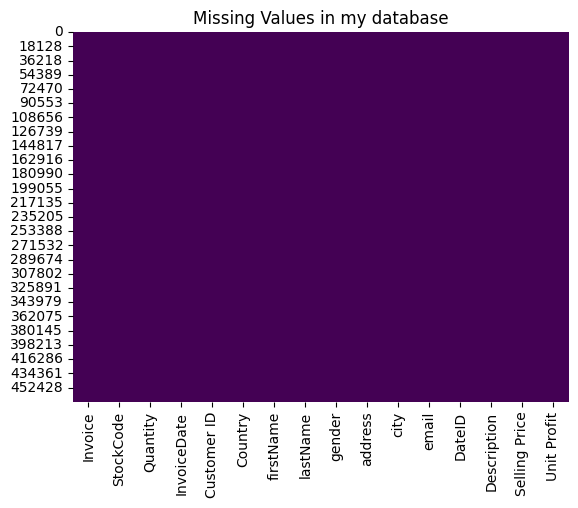

In [ ]:
# heat map
sns.heatmap(sales_fact.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in my database")
plt.show()

In [ ]:
#making a product_info_dimension with columns info id , description from product dimension
product_info_dimension = product_dimension[['infoID', 'Description',"Category"]]
# droping description from product dimension
product_dimension = product_dimension.drop(columns=['Description'])
# making a product_category_dimension with categoryID ,  category name from product dimension
product_category_dimension = product_dimension[['Category']]
#making categoryID for product category dimension
product_category_dimension['CategoryID'] = range(1, len(product_category_dimension) + 1)
# reordering columns
product_category_dimension = product_category_dimension[['CategoryID', 'Category']]
#removing duplicates from product category dimension based on category
product_category_dimension = product_category_dimension.drop_duplicates(subset=['Category'])
# droping category from product dimension
product_dimension = product_dimension.drop(columns=['Category'])

<ipython-input-38-1c2e9f0bf082>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_category_dimension['CategoryID'] = range(1, len(product_category_dimension) + 1)


In [ ]:
# merging product info dimension and product category dimension
product_info_dimension = pd.merge(product_info_dimension, product_category_dimension, on='Category', how='left')
#droping category
product_info_dimension = product_info_dimension.drop(columns=['Category'])
product_info_dimension

,infoID,Description,CategoryID
0,1,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1
1,2,PINK CHERRY LIGHTS,1
2,3,WHITE CHERRY LIGHTS,1
3,4,RECORD FRAME 7 SINGLE SIZE,1
4,5,STRAWBERRY CERAMIC TRINKET BOX,5
...,...,...,...
4047,4048,BAKING MOULD CHOCOLATE CUPCAKES,7
4048,4049,BAKING MOULD ROSE WHITE CHOCOLATE,7
4049,4050,BAKING MOULD ROSE MILK CHOCOLATE,7
4050,4051,BAKING MOULD EASTER EGG MILK CHOC,7


In [ ]:
#loading to csv
product_dimension.to_csv('product_dimension.csv', index=False)
product_info_dimension.to_csv('product_info_dimension.csv', index=False)
product_category_dimension.to_csv('product_category_dimension.csv', index=False)

In [ ]:
# making a total sales column
sales_fact['Total_Price'] = sales_fact['Quantity'] * sales_fact['Selling Price']
#making total profit column
sales_fact['Total_Profit'] = sales_fact['Quantity'] * sales_fact['Unit Profit']
#changing invoice type to integer
sales_fact['Invoice'] = sales_fact['Invoice'].astype(int)

<ipython-input-40-8991bc2e0154>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_fact['Total_Price'] = sales_fact['Quantity'] * sales_fact['Selling Price']
<ipython-input-40-8991bc2e0154>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_fact['Total_Profit'] = sales_fact['Quantity'] * sales_fact['Unit Profit']
<ipython-input-40-8991bc2e0154>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
sales_fact = sales_fact[['Invoice', 'Customer ID', 'StockCode', 'DateID', 'Quantity', 'Total_Price','Total_Profit']]
sales_fact.head()

,Invoice,Customer ID,StockCode,DateID,Quantity,Total_Price,Total_Profit
0,489434,13085,85048,1,12,83.4,13.92
1,489434,13085,79323P,1,12,81.0,13.44
2,489434,13085,79323W,1,12,81.0,13.44
3,489434,13085,22041,1,48,100.8,16.80
4,489434,13085,21232,1,24,30.0,5.04


In [ ]:
sales_fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469213 entries, 0 to 470528
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice       469213 non-null  int64  
 1   Customer ID   469213 non-null  int64  
 2   StockCode     469213 non-null  string 
 3   DateID        469213 non-null  int64  
 4   Quantity      469213 non-null  int64  
 5   Total_Price   469213 non-null  float64
 6   Total_Profit  469213 non-null  float64
dtypes: float64(2), int64(4), string(1)
memory usage: 28.6 MB


In [ ]:

#changing type of invoice to integer
sales_fact['Invoice'] = pd.to_numeric(sales_fact['Invoice'], errors='coerce')
sales_fact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469213 entries, 0 to 470528
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice       469213 non-null  int64  
 1   Customer ID   469213 non-null  int64  
 2   StockCode     469213 non-null  string 
 3   DateID        469213 non-null  int64  
 4   Quantity      469213 non-null  int64  
 5   Total_Price   469213 non-null  float64
 6   Total_Profit  469213 non-null  float64
dtypes: float64(2), int64(4), string(1)
memory usage: 28.6 MB


<ipython-input-43-a2e74644268f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_fact['Invoice'] = pd.to_numeric(sales_fact['Invoice'], errors='coerce')


In [ ]:
#rounding the totalprice to 2 decimals and total profit
sales_fact['Total_Price'] = sales_fact['Total_Price'].round(2)
sales_fact['Total_Profit'] = sales_fact['Total_Profit'].round(2)

<ipython-input-44-9f7dc98c5833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_fact['Total_Price'] = sales_fact['Total_Price'].round(2)
<ipython-input-44-9f7dc98c5833>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_fact['Total_Profit'] = sales_fact['Total_Profit'].round(2)


In [ ]:

# renaming sales_fact to order_fact
order_fact = sales_fact
order_fact

,Invoice,Customer ID,StockCode,DateID,Quantity,Total_Price,Total_Profit
0,489434,13085,85048,1,12,83.40,13.92
1,489434,13085,79323P,1,12,81.00,13.44
2,489434,13085,79323W,1,12,81.00,13.44
3,489434,13085,22041,1,48,100.80,16.80
4,489434,13085,21232,1,24,30.00,5.04
...,...,...,...,...,...,...,...
470524,538171,17530,22271,18332,2,5.90,0.98
470525,538171,17530,22750,18332,1,3.75,0.62
470526,538171,17530,22751,18332,1,3.75,0.62
470527,538171,17530,20970,18332,2,7.50,1.24


In [ ]:
#loading to csv
order_fact.to_csv('order_fact.csv', index=False)

In [ ]:
# making an invoice info dimension by getting the invoice from oder fact
invoice_info_dimension = order_fact[['Invoice']]
#renaming invoice to invoiceid
invoice_info_dimension = invoice_info_dimension.rename(columns={'Invoice': 'InvoiceID'})
#removing duplicates
invoice_info_dimension = invoice_info_dimension.drop_duplicates(subset=['InvoiceID'])
# making an invoice number column
invoice_info_dimension['InvoiceNumber'] = range(1, len(invoice_info_dimension) + 1)
invoice_info_dimension

,InvoiceID,InvoiceNumber
0,489434,1
8,489435,2
12,489436,3
31,489437,4
54,489438,5
...,...,...
470371,538167,19558
470396,538168,19559
470426,538169,19560
470439,538170,19561


In [ ]:
#loading to csv
invoice_info_dimension.to_csv('invoice_info_dimension.csv', index=False)